# Baseball Statistics Data Analysis
#### Completed by Narissa Kreutz on August 2nd, 2017 as a submission for the Data Analyst NanoDegree by Udacity

As part of the Data Analyst NanoDegree, students are asked to complete a Data Analysis on either [Titantic](https://www.kaggle.com/c/titanic/data) or [Baseball Statistics](http://www.seanlahman.com/baseball-archive/statistics/) data, limited in scope to answering 1-3 questions of their choosing. I chose to analyze the Baseball Statistics database. 

According to the [README](http://seanlahman.com/files/database/readme2016.txt):
This database was created by Sean Lahman, and contains pitching, hitting, and fielding statistics for Major League Baseball from 1871 through 2016.  It includes data from the two current leagues (American and National), the four other "major" leagues (American Association, Union Association, Players League, andFederal League), and the National Association of 1871-1875. 



The database is comprised of the following main tables:

    - MASTER - Player names, DOB, and biographical info
    - Batting - batting statistics
    - Pitching - pitching statistics
    - Fielding - fielding statistics

It is supplemented by these tables:

    - AllStarFull - All-Star appearances
    - HallofFame - Hall of Fame voting data
    - Managers - managerial statistics
    - Teams - yearly stats and standings 
    - BattingPost - post-season batting statistics
    - PitchingPost - post-season pitching statistics
    - TeamFranchises - franchise information
    - FieldingOF - outfield position data  
    - FieldingPost- post-season fielding data
    - FieldingOFsplit - LF/CF/RF splits
    - ManagersHalf - split season data for managers
    - TeamsHalf - split season data for teams
    - Salaries - player salary data
    - SeriesPost - post-season series information
    - AwardsManagers - awards won by managers 
    - AwardsPlayers - awards won by players
    - AwardsShareManagers - award voting for manager awards
    - AwardsSharePlayers - award voting for player awards
    - Appearances - details on the positions a player appeared at
    - Schools - list of colleges that players attended
    - CollegePlaying - list of players and the colleges they attended
    - Parks - list of major league ballparks
    - HomeGames - Number of homegames played by each team in each ballpark
    
As you can see, there is a wealth of information here, and therefore many questions could potentially be posed and answered with this data, many of which boil down to the question: How is a player feature (or combination of player features) related to measures of career success?
There are many player features available to be examined, including but not limited to:

    Height/Weight/BMI
    Right or Left-Handedness
    Position Played
    Games Played as a Starter
    Home Runs Hit vs. Strike-Outs at Bat
    Pitching/Batting/Outfield Statistics
    Number of Seasons or Games Played
    College Attended
    Coach of the Team/ Sucess of the Coach
    Team they Played for
    etc.
    
And career sucess could potentially be measured in many different ways:
    
    Salaries
    Awards Won
    Induction into Hall of Fame
    Number of All-Star Games Played
    etc.

It is interesting to note that depending on how career sucess is measured, the other measures of career sucess could be used as player features (eg. the question: how does a player's salary (player feature) correspond to their probability of winning an award (measure of sucess)? could be posed)

To complete an in-depth analysis of all possible features related to any chosen measure of sucess, Machine Learning Algorithms such as Principal Component Analysis would definitely be of great benefit. However, for the scope of this project, Machine Learning will not be used, and I will narrow my focus by defining sucess as "Induction into the Hall of Fame", analyzing only the player features contained in the Master table, effectively limiting player features to player demographics such as age, height, weight, BMI, Birth Country and Length of Career. 

#### Therefore, in summary, the questions I will attempt to answer by conducting this Data Analysis is: 

    1. How are player demographics, specifically height, weight, BMI, Birth Country and length of Career related to the probability of being inducted into the Hall of Fame?
    2. At what age is a player most likely to be inducted into the hall of fame?

# Data Wrangling (Aquisition and Cleaning)

In [1]:
# Make interactive matplotlib visualizations appear inline
%matplotlib nbagg

# Import Dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# Stop Pandas from Truncating Columns when displaying the DataFrames
pd.set_option('display.max_columns', None) 

## MASTER table
### Player names, DOB, and biographical info (from [README](http://seanlahman.com/files/database/readme2016.txt) )

    playerID       A unique code asssigned to each player.  The playerID links
                 the data in this file with records in the other files.
    birthYear      Year player was born
    birthMonth     Month player was born
    birthDay       Day player was born
    birthCountry   Country where player was born
    birthState     State where player was born
    birthCity      City where player was born
    deathYear      Year player died
    deathMonth     Month player died
    deathDay       Day player died
    deathCountry   Country where player died
    deathState     State where player died
    deathCity      City where player died
    nameFirst      Player's first name
    nameLast       Player's last name
    nameGiven      Player's given name (typically first and middle)
    weight         Player's weight in pounds
    height         Player's height in inches
    bats           Player's batting hand (left, right, or both)         
    throws         Player's throwing hand (left or right)
    debut          Date that player made first major league appearance
    finalGame      Date that player made last major league appearance
    retroID        ID used by retrosheet
    bbrefID        ID used by Baseball Reference website

In [2]:
# Reading the "Master" table into a Panda's DataFrame
master_df = pd.read_csv('baseballdatabank-2017.1/core/Master.csv') 

#visualizing the first 5 rows of data from the "Master" Table
print master_df.head() 

    playerID  birthYear  birthMonth  birthDay birthCountry birthState  \
0  aardsda01     1981.0        12.0      27.0          USA         CO   
1  aaronha01     1934.0         2.0       5.0          USA         AL   
2  aaronto01     1939.0         8.0       5.0          USA         AL   
3   aasedo01     1954.0         9.0       8.0          USA         CA   
4   abadan01     1972.0         8.0      25.0          USA         FL   

    birthCity  deathYear  deathMonth  deathDay deathCountry deathState  \
0      Denver        NaN         NaN       NaN          NaN        NaN   
1      Mobile        NaN         NaN       NaN          NaN        NaN   
2      Mobile     1984.0         8.0      16.0          USA         GA   
3      Orange        NaN         NaN       NaN          NaN        NaN   
4  Palm Beach        NaN         NaN       NaN          NaN        NaN   

  deathCity nameFirst nameLast       nameGiven  weight  height bats throws  \
0       NaN     David  Aardsma     Dav

In [3]:
#Counting the number of unique players in the DataBase
print "Number of Players in the DataBase:", len(master_df['playerID'].unique()) 

Number of Players in the DataBase: 19105


In [4]:
#Visualizing the Column names and datatypes present in each column
print master_df.dtypes 

playerID         object
birthYear       float64
birthMonth      float64
birthDay        float64
birthCountry     object
birthState       object
birthCity        object
deathYear       float64
deathMonth      float64
deathDay        float64
deathCountry     object
deathState       object
deathCity        object
nameFirst        object
nameLast         object
nameGiven        object
weight          float64
height          float64
bats             object
throws           object
debut            object
finalGame        object
retroID          object
bbrefID          object
dtype: object


The player features I am interested in analyzing that can be inferred from this table include: 
    
    Birth Country
    Height/Weight/BMI
    Length of Career 
    Age at Induction
    
Some of these features (Birth Country, Height, Weight) are already formated properly for my analysis, the others will need some manipulation. First, I'll check that there isn't any surprising data in the features I shouldn't need to manipulate:

In [5]:
print master_df['birthCountry'].unique()

['USA' 'D.R.' 'Venezuela' 'Cuba' 'Mexico' 'Panama' 'CAN' 'P.R.' 'Russia'
 'Colombia' 'Nicaragua' 'Germany' 'Norway' 'Japan' 'Ireland' 'Italy'
 'Bahamas' 'United Kingdom' 'South Korea' 'Curacao' 'Australia'
 'Czech Republic' 'V.I.' 'Netherlands' 'France' 'Aruba' nan 'Sweden'
 'Hong Kong' 'Afghanistan' 'Spain' 'Greece' 'Taiwan' 'Philippines'
 'Jamaica' 'Poland' 'Brazil' 'Viet Nam' 'Guam' 'Denmark' 'Switzerland'
 'Austria' 'Singapore' 'China' 'Belgium' 'Belize' 'Indonesia' 'Finland'
 'At Sea' 'Slovakia' 'American Samoa' 'Saudi Arabia' 'Honduras' 'Latvia']


Theres nothing truly surprising about the categories (although 'At Sea' definitely is interesting!), but the names could use some cleaning up, as some country names are abbreviated while others are written out in full:

In [6]:
def abbreviated_to_full_names(country):
    '''
    Changes abbreviated Country Names to Full Names
    '''
    if country == 'D.R.':
        return 'Dominican Republic'
    elif country == 'CAN':
        return 'Canada'
    elif country == 'P.R.':
        return 'Puerto Rico'
    elif country == 'V.I.':
        return 'Virgin Islands' 
    else:
        return country

In [7]:
master_df['birthCountry'] = master_df['birthCountry'].apply(abbreviated_to_full_names)
print master_df['birthCountry'].unique()

['USA' 'Dominican Republic' 'Venezuela' 'Cuba' 'Mexico' 'Panama' 'Canada'
 'Puerto Rico' 'Russia' 'Colombia' 'Nicaragua' 'Germany' 'Norway' 'Japan'
 'Ireland' 'Italy' 'Bahamas' 'United Kingdom' 'South Korea' 'Curacao'
 'Australia' 'Czech Republic' 'Virgin Islands' 'Netherlands' 'France'
 'Aruba' nan 'Sweden' 'Hong Kong' 'Afghanistan' 'Spain' 'Greece' 'Taiwan'
 'Philippines' 'Jamaica' 'Poland' 'Brazil' 'Viet Nam' 'Guam' 'Denmark'
 'Switzerland' 'Austria' 'Singapore' 'China' 'Belgium' 'Belize' 'Indonesia'
 'Finland' 'At Sea' 'Slovakia' 'American Samoa' 'Saudi Arabia' 'Honduras'
 'Latvia']


That looks better, lets move on to Height and Weight:

In [8]:
print master_df[['height', 'weight']].describe()

             height        weight
count  18320.000000  18251.000000
mean      72.273799    186.375596
std        2.603904     21.524765
min       43.000000     65.000000
25%       71.000000    170.000000
50%       72.000000    185.000000
75%       74.000000    200.000000
max       83.000000    320.000000


Considering this is player info for Major League Baseball, a Minimum of 43 inches tall and 65 pounds seems out of place. Let's investigate:

In [9]:
print master_df.loc[master_df['weight'] < 100]

       playerID  birthYear  birthMonth  birthDay birthCountry birthState  \
5838  gaedeed01     1925.0         6.0       8.0          USA         IL   

     birthCity  deathYear  deathMonth  deathDay deathCountry deathState  \
5838   Chicago     1961.0         6.0      18.0          USA         IL   

     deathCity nameFirst nameLast    nameGiven  weight  height bats throws  \
5838   Chicago     Eddie   Gaedel  Edward Carl    65.0    43.0    R      L   

           debut   finalGame   retroID    bbrefID  
5838  1951-08-19  1951-08-19  gaede101  gaedeed01  


[Edward Carl Gaedel](https://en.wikipedia.org/wiki/Eddie_Gaedel) was an American with Dwarfism that played one game for the St. Louis Browns on August 19th, 1951. Makes sense! Since he did officially play, I'll keep him in the Dataset while keeping in mind that he may skew the results.

Obtaining the BMI requires Height to be converted to Meters (from inches) and Weight to be converted to Kilograms (from pounds) as the formula for BMI is: $$BMI = kg / {m^2}$$ 

In [10]:
# Converting height to Meters (from inches)
def convert_inches_to_meters(inches):
    return (inches * 2.54) / 100

#Converting weight to Kilograms (from Pounds)
def convert_pounds_to_kilograms(pounds):
    return pounds * 0.45

master_df['height'] = master_df['height'].apply(convert_inches_to_meters)
master_df['weight'] = master_df['weight'].apply(convert_pounds_to_kilograms)
#Create a column for BMI
master_df['BMI'] = master_df['weight'] / (master_df['height'] ** 2)

In [11]:
# Check that the BMI Column was added properly
print master_df.head()

    playerID  birthYear  birthMonth  birthDay birthCountry birthState  \
0  aardsda01     1981.0        12.0      27.0          USA         CO   
1  aaronha01     1934.0         2.0       5.0          USA         AL   
2  aaronto01     1939.0         8.0       5.0          USA         AL   
3   aasedo01     1954.0         9.0       8.0          USA         CA   
4   abadan01     1972.0         8.0      25.0          USA         FL   

    birthCity  deathYear  deathMonth  deathDay deathCountry deathState  \
0      Denver        NaN         NaN       NaN          NaN        NaN   
1      Mobile        NaN         NaN       NaN          NaN        NaN   
2      Mobile     1984.0         8.0      16.0          USA         GA   
3      Orange        NaN         NaN       NaN          NaN        NaN   
4  Palm Beach        NaN         NaN       NaN          NaN        NaN   

  deathCity nameFirst nameLast       nameGiven  weight  height bats throws  \
0       NaN     David  Aardsma     Dav

In [12]:
# Check that there's nothing surprising about the BMI Column
print master_df['BMI'].describe()

count    18197.000000
mean        24.839189
std          2.054396
min         17.580375
25%         23.522166
50%         24.755503
75%         25.963089
max         39.434219
Name: BMI, dtype: float64


The BMI's are all within the biological range, nothing surprising here. Let's move on:

Obtaining the Length of the Player's Career will require casting the Debut Date and Final Game Date to datetime objects, and finding the number of days that Player's career was active (by subtracting the Debut date from the final game date)

In [13]:
#Cast the Debut and Final Game strings to DateTime Objects
master_df[['debut', 'finalGame']] = master_df[['debut', 'finalGame']].apply(pd.to_datetime)

# Finding days between the Debut and Final Game Dates - creates a timedelta object
master_df['length_of_career'] = master_df['finalGame'] - master_df['debut'] 

#convert timedelta object to number for calculations
master_df['length_of_career'] = master_df['length_of_career'].dt.days 

#convert to years/seasons instead of days
master_df['length_of_career'] = master_df['length_of_career'] / 365.0

#show the statistics
print master_df[['length_of_career']].describe()

       length_of_career
count      18910.000000
mean           4.827147
std            5.021182
min           -0.010959
25%            0.378082
50%            3.186301
75%            8.030137
max           35.238356


It's surprising to me that there is a negative value here - this would only happen if a player's finalGame date came **before** their Debut Date. Let's investigate:

In [14]:
print master_df.loc[master_df['length_of_career'] < 0]

        playerID  birthYear  birthMonth  birthDay birthCountry birthState  \
11509  menzete01     1897.0        11.0       4.0          USA         MO   

       birthCity  deathYear  deathMonth  deathDay deathCountry deathState  \
11509  St. Louis     1969.0        12.0      23.0          USA         MO   

       deathCity nameFirst nameLast         nameGiven  weight  height bats  \
11509  St. Louis       Ted    Menze  Theodore Charles    77.4  1.7526    R   

      throws      debut  finalGame   retroID    bbrefID        BMI  \
11509      R 1918-04-27 1918-04-23  menzt101  menzete01  25.198538   

       length_of_career  
11509         -0.010959  


According to Wikipedia, [Theodore Charles Menze](https://en.wikipedia.org/wiki/Ted_Menze) played only one game for the St. Louis Cardinals on April 23rd, 1918. Therefore, this is a typo in the data, as it states his Debut game was on April 27th, 1918. We can fix that:

In [15]:
master_df.at[11509,'debut'] = pd.to_datetime('1918/4/23')

Now to re-calculate the 'length_of_career' column:
(Side Note: I realize that this is repetitive, but for the scope of this project, I am trying to show my steps - In a real Data Analysis, I would just re-run the same code above once I had fixed the erraneous data point instead of creating a function and using it in two places)

In [16]:
# Finding days between the Debut and Final Game Dates - creates a timedelta object
master_df['length_of_career'] = master_df['finalGame'] - master_df['debut'] 

#convert timedelta object to number for calculations
master_df['length_of_career'] = master_df['length_of_career'].dt.days 

#convert to years/seasons instead of days
master_df['length_of_career'] = master_df['length_of_career'] / 365.0

#show the statistics
print master_df[['length_of_career']].describe()

       length_of_career
count      18910.000000
mean           4.827147
std            5.021181
min            0.000000
25%            0.378082
50%            3.186301
75%            8.030137
max           35.238356


Now when we run the statistics, it looks a bit better, nothing is too surprising: the minimum length of career is 0 years, meaning that the player only played one game, and the maximum is approximately 35.2 years (or seasons). I'm still curious about the minimum and maximum numbers though, so let's investigate a little further:

In [17]:
played_one_game_only = master_df.loc[master_df['length_of_career'] == 0]
print "Players who only played one game:", len(played_one_game_only)

Players who only played one game: 1010


In [18]:
played_over_30_years = master_df.loc[master_df['length_of_career'] >= 30]
print "Players who played for over 30 years:", len(played_over_30_years)
print played_over_30_years

Players who played for over 30 years: 4
        playerID  birthYear  birthMonth  birthDay birthCountry birthState  \
266    altroni01     1876.0         9.0      15.0          USA         OH   
11785  minosmi01     1925.0        11.0      29.0         Cuba  La Habana   
12807  olearch01     1875.0        10.0      15.0          USA         IL   
12909  orourji01     1850.0         9.0       1.0          USA         CT   

        birthCity  deathYear  deathMonth  deathDay deathCountry deathState  \
266    Cincinnati     1965.0         1.0      20.0          USA         DC   
11785   La Habana     2015.0         3.0       1.0          USA         IL   
12807     Chicago     1941.0         1.0       6.0          USA         IL   
12909  Bridgeport     1919.0         1.0       8.0          USA         CT   

        deathCity nameFirst  nameLast                nameGiven  weight  \
266    Washington      Nick   Altrock                 Nicholas   88.65   
11785     Chicago    Minnie    Mino

It looks like there are 1010 players who only played one game, and 4 players who played for more than 30 years. Looking into the players that played for more than 30 years, [Nicholas Altrock](https://en.wikipedia.org/wiki/Nick_Altrock) was a pitcher that was injured in 1906, and served as a "substitute pinch-hitter" after that; [Minnie Minoso](https://en.wikipedia.org/wiki/Minnie_Mi%C3%B1oso) did play from April 1949 through to November 1980 as stated; [Charley O'Leary](https://en.wikipedia.org/wiki/Charley_O%27Leary) actually retired in 1913 (therefore played only 9 years), but was called out of retirement to play as a substitute pinch hitter in one game in 1934; and [Jim O'Rourke](https://en.wikipedia.org/wiki/Jim_O%27Rourke_(baseball) also played from April 1872 through to October 1904 as stated. I also looked into a couple of the players who only played for one game, they seemed "legitimate" as well. Considering these were valid (or semi-valid) representations, I decided to keep this data (for now), keeping in mind that they may skew my results later.

Next, I want to check for missing data (NaNs) in the Debut, Final Game and Length of Career Columns:

In [19]:
#Checking for Nan's in each column
debut_nans = master_df[pd.isnull(master_df['debut'])]
final_game_nans = master_df[pd.isnull(master_df['finalGame'])]
length_of_career_nans = master_df[pd.isnull(master_df['length_of_career'])]

print "Number of NaNs in the Debut Game Column:", len(debut_nans)
print "Number of NaNs in the Final Game Column:", len(final_game_nans)
print "Number of NaNs in the Length of Career Column:", len(length_of_career_nans)

Number of NaNs in the Debut Game Column: 195
Number of NaNs in the Final Game Column: 195
Number of NaNs in the Length of Career Column: 195


Looking into these players, they were players in the minor leagues who became managers/coaches for the major leagues, but never played in the major leagues themselves. Since I am only interested in Players, I will remove them. Seeing that there are the same number of NaN's in each column, removing the rows with NaN's in one column should remove the NaN's in all 3 colums.

In [20]:
#Creating a copy, and dropping rows with Nan's in the Debut Game Column
master_df_players_only = master_df.dropna(how='any', subset = ['debut'], inplace=False)

#Checking the Number of Players left in the DataBase: 
#There were 19105 rows in the original - 195 Nan's = 18910 remaining
print "Number of Players in the DataBase:", len(master_df_players_only)

Number of Players in the DataBase: 18910


In [21]:
#Checking for residual Nan's in Final Game and Length of Careeer Columns
debut_nans_players_only = master_df_players_only[pd.isnull(master_df_players_only['debut'])]
final_game_nans_players_only = master_df_players_only[pd.isnull(master_df_players_only['finalGame'])]
length_of_career_nans_players_only = master_df_players_only[pd.isnull(master_df_players_only['length_of_career'])]

print "Number of NaNs in the Debut Game Column:", len(debut_nans_players_only)
print "Number of NaNs in the Final Game Column:", len(final_game_nans_players_only)
print "Number of NaNs in the Length of Career Column:", len(length_of_career_nans_players_only)

Number of NaNs in the Debut Game Column: 0
Number of NaNs in the Final Game Column: 0
Number of NaNs in the Length of Career Column: 0


Looks like my hypothesis was correct, all Nan's in all 3 Columns are gone. Now I want to see how the Length of Career correlates to the probability of getting Inducted into the Hall of Fame. To do this, I want to split my data into players that were inducted and players that weren't. 

First, I need to read the Hall of Fame Data into a Pandas DataFrame:

2.6  HallOfFame table

    playerID       Player ID code
    yearid         Year of ballot
    votedBy        Method by which player was voted upon
    ballots        Total ballots cast in that year
    needed         Number of votes needed for selection in that year
    votes          Total votes received
    inducted       Whether player was inducted by that vote or not (Y or N)
    category       Category in which candidate was honored
    needed_note    Explanation of qualifiers for special elections

In [22]:
# read csv into a DataFrame
hall_of_fame_df = pd.read_csv('baseballdatabank-2017.1/core/HallOfFame.csv')

#visualize the head of the table
print hall_of_fame_df.head()

    playerID  yearid votedBy  ballots  needed  votes inducted category  \
0   cobbty01    1936   BBWAA    226.0   170.0  222.0        Y   Player   
1   ruthba01    1936   BBWAA    226.0   170.0  215.0        Y   Player   
2  wagneho01    1936   BBWAA    226.0   170.0  215.0        Y   Player   
3  mathech01    1936   BBWAA    226.0   170.0  205.0        Y   Player   
4  johnswa01    1936   BBWAA    226.0   170.0  189.0        Y   Player   

  needed_note  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  


In [23]:
# Check for Nan's in the Inducted and Category Columns (columns I want to use or keep)
print "Number of Nan's in 'inducted' Column:", len(hall_of_fame_df[pd.isnull(hall_of_fame_df['inducted'])])
print "Number of Nan's in 'category' Column:", len(hall_of_fame_df[pd.isnull(hall_of_fame_df['category'])])
print "Number of Nan's in 'yearid' Column:", len(hall_of_fame_df[pd.isnull(hall_of_fame_df['yearid'])])
# Since there are no Nans, nothing further is needed

Number of Nan's in 'inducted' Column: 0
Number of Nan's in 'category' Column: 0
Number of Nan's in 'yearid' Column: 0


In [24]:
# See what categories there are for the 'inducted' Column
print "Inducted Column Categories:", hall_of_fame_df['inducted'].unique()

# See what categories there are for the 'category' Column
print "Category Column Categories:", hall_of_fame_df['category'].unique()

# See the first and last year of inductions captured by the data
print "First Year of Hall of Fame:", hall_of_fame_df['yearid'].min()
print "Last Year of Hall of Fame:", hall_of_fame_df['yearid'].max()

Inducted Column Categories: ['Y' 'N']
Category Column Categories: ['Player' 'Manager' 'Pioneer/Executive' 'Umpire']
First Year of Hall of Fame: 1936
Last Year of Hall of Fame: 2017


In [25]:
# Since I only want players who were inducted into the Hall of Fame, 
# keep only those marked 'Y' for Yes in the Inducted Column and
# those marked 'Player' in the Category Column
hall_of_famers = hall_of_fame_df[(hall_of_fame_df['inducted'] == 'Y') & (hall_of_fame_df['category'] == 'Player')]

#Check Number of Players before and after removal of Players who were not Inducted
print "Number of Players Nominated for Hall of Fame:", len(hall_of_fame_df)

Number of Players Nominated for Hall of Fame: 4156


In [26]:
# Lists of Columns I want to keep from each DataFrame upon merging
columns_from_master = ['playerID', 'birthYear', 'deathYear', 'birthCountry', 'nameFirst', 'nameLast', 'nameGiven',
                      'weight', 'height', 'BMI', 'length_of_career']
columns_from_hall_of_fame = ['playerID', 'yearid']

# Merging the Master and Hall of Fame DataFrames
hall_of_famers_master_df = master_df_players_only[columns_from_master].merge(hall_of_famers[columns_from_hall_of_fame], on='playerID', how='inner')

# Check how many players are left that were inducted into the hall of fame
print "Number of Players Inducted into Hall of Fame:", len(hall_of_famers_master_df)

Number of Players Inducted into Hall of Fame: 224


In [27]:
#Check that the merge happened properly and I have all the columns I wanted
print hall_of_famers_master_df.head()

    playerID  birthYear  deathYear birthCountry nameFirst   nameLast  \
0  aaronha01     1934.0        NaN          USA      Hank      Aaron   
1  alexape01     1887.0     1950.0          USA      Pete  Alexander   
2  alomaro01     1968.0        NaN  Puerto Rico   Roberto     Alomar   
3  ansonca01     1852.0     1922.0          USA       Cap      Anson   
4  aparilu01     1934.0        NaN    Venezuela      Luis   Aparicio   

            nameGiven  weight  height        BMI  length_of_career  yearid  
0         Henry Louis   81.00  1.8288  24.218798         22.490411    1982  
1    Grover Cleveland   83.25  1.8542  24.214254         19.131507    1938  
2             Roberto   82.80  1.8288  24.756994         16.383562    2011  
3  Adrian Constantine  102.15  1.8288  30.542596         26.430137    1939  
4        Luis Ernesto   72.00  1.7526  23.440501         17.460274    1984  


Obtaining the Age of the player in the year that player was Inducted into the Hall of Fame requires subtracting the player's Birth Year from the Induction Year. Because the date of induction is variable and not present in the data, it may have been before or after the Player's birthday for that year, meaning that this calculation may be off by 1 year for Players whose birthday came later in the year than the Induction date. As this error is small and the data for the dates of induction are not available in this dataset, I will continue with these calculations, keeping in mind that there is some error introduced.

In [28]:
# If birthYear is Nan, remove the row as that data can't be used to calculate an age 
birthYear_nans = hall_of_famers_master_df[pd.isnull(hall_of_famers_master_df['birthYear'])]
print "Number of NaNs in the BirthYear Column:", len(birthYear_nans)
# Since there are no NaNs, no need to remove anything

Number of NaNs in the BirthYear Column: 0


In [29]:
# Create a Boolean 'PostHumous_Induction' Column where True = Posthumously Inducted (year of induction >= death Year)
hall_of_famers_master_df['PostHumous_Induction'] = hall_of_famers_master_df['yearid'] >= hall_of_famers_master_df['deathYear']

# Check to see if the Column was created properly
print hall_of_famers_master_df.head()

    playerID  birthYear  deathYear birthCountry nameFirst   nameLast  \
0  aaronha01     1934.0        NaN          USA      Hank      Aaron   
1  alexape01     1887.0     1950.0          USA      Pete  Alexander   
2  alomaro01     1968.0        NaN  Puerto Rico   Roberto     Alomar   
3  ansonca01     1852.0     1922.0          USA       Cap      Anson   
4  aparilu01     1934.0        NaN    Venezuela      Luis   Aparicio   

            nameGiven  weight  height        BMI  length_of_career  yearid  \
0         Henry Louis   81.00  1.8288  24.218798         22.490411    1982   
1    Grover Cleveland   83.25  1.8542  24.214254         19.131507    1938   
2             Roberto   82.80  1.8288  24.756994         16.383562    2011   
3  Adrian Constantine  102.15  1.8288  30.542596         26.430137    1939   
4        Luis Ernesto   72.00  1.7526  23.440501         17.460274    1984   

  PostHumous_Induction  
0                False  
1                False  
2                False 

In [30]:
# Create a Column for Age of Induction for non-posthumously inducted players (yearid - birthYear). 
non_posthumous_group = hall_of_famers_master_df[hall_of_famers_master_df['PostHumous_Induction'] == False] 
hall_of_famers_master_df['age_of_induction'] = non_posthumous_group['yearid'] - non_posthumous_group['birthYear']

# Add posthumously inducted players: the induction age will be the age at which they died (deathYear - birthYear)
hall_of_famers_master_df['age_of_induction'].fillna(value = (hall_of_famers_master_df['deathYear'] - hall_of_famers_master_df['birthYear']), inplace=True)

# Check to see that the Nans were filled properly
print hall_of_famers_master_df.head()

    playerID  birthYear  deathYear birthCountry nameFirst   nameLast  \
0  aaronha01     1934.0        NaN          USA      Hank      Aaron   
1  alexape01     1887.0     1950.0          USA      Pete  Alexander   
2  alomaro01     1968.0        NaN  Puerto Rico   Roberto     Alomar   
3  ansonca01     1852.0     1922.0          USA       Cap      Anson   
4  aparilu01     1934.0        NaN    Venezuela      Luis   Aparicio   

            nameGiven  weight  height        BMI  length_of_career  yearid  \
0         Henry Louis   81.00  1.8288  24.218798         22.490411    1982   
1    Grover Cleveland   83.25  1.8542  24.214254         19.131507    1938   
2             Roberto   82.80  1.8288  24.756994         16.383562    2011   
3  Adrian Constantine  102.15  1.8288  30.542596         26.430137    1939   
4        Luis Ernesto   72.00  1.7526  23.440501         17.460274    1984   

  PostHumous_Induction  age_of_induction  
0                False              48.0  
1           

Next I will create my Non-Hall of Famers Comparison Group:

In [31]:
#Create a group of players in the master table that are not in the hall of famers table
non_hall_of_famers_master_df = master_df_players_only.loc[~master_df_players_only['playerID'].isin(hall_of_famers_master_df['playerID'])]

#Choose only Columns that I want to use
columns_to_use = ['playerID', 'birthCountry', 'nameFirst', 'nameLast', 'nameGiven', 
                  'weight', 'height', 'BMI', 'length_of_career']
non_hall_of_famers_master_df = non_hall_of_famers_master_df[columns_to_use]

# Visualize DataFrame to make sure it was created properly
print non_hall_of_famers_master_df.head()

    playerID        birthCountry nameFirst nameLast         nameGiven  weight  \
0  aardsda01                 USA     David  Aardsma       David Allan   96.75   
2  aaronto01                 USA    Tommie    Aaron        Tommie Lee   85.50   
3   aasedo01                 USA       Don     Aase    Donald William   85.50   
4   abadan01                 USA      Andy     Abad     Fausto Andres   82.80   
5   abadfe01  Dominican Republic  Fernando     Abad  Fernando Antonio   99.00   

   height        BMI  length_of_career  
0  1.9050  26.660053         11.386301  
2  1.9050  23.560047          9.468493  
3  1.9050  23.560047         13.197260  
4  1.8542  24.083366          4.591781  
5  1.8542  28.795329          6.167123  


Lastly, I want to create a column in the master dataframe stating whether the player was an inductee or not, so I can compare side-to-side when visualizing

In [32]:
master_df['hall_of_famer'] = master_df['playerID'].isin(hall_of_famers_master_df['playerID'])

#update players only table to include this column
master_df_players_only = master_df_players_only.merge(master_df[['hall_of_famer', 'playerID']], on = 'playerID', how='left')

print master_df_players_only.head()

    playerID  birthYear  birthMonth  birthDay birthCountry birthState  \
0  aardsda01     1981.0        12.0      27.0          USA         CO   
1  aaronha01     1934.0         2.0       5.0          USA         AL   
2  aaronto01     1939.0         8.0       5.0          USA         AL   
3   aasedo01     1954.0         9.0       8.0          USA         CA   
4   abadan01     1972.0         8.0      25.0          USA         FL   

    birthCity  deathYear  deathMonth  deathDay deathCountry deathState  \
0      Denver        NaN         NaN       NaN          NaN        NaN   
1      Mobile        NaN         NaN       NaN          NaN        NaN   
2      Mobile     1984.0         8.0      16.0          USA         GA   
3      Orange        NaN         NaN       NaN          NaN        NaN   
4  Palm Beach        NaN         NaN       NaN          NaN        NaN   

  deathCity nameFirst nameLast       nameGiven  weight  height bats throws  \
0       NaN     David  Aardsma     Dav

Great! Now that the data is Wrangled and Cleaned, I can move onto the Exploration and Visualization Phase

# Data Exploration and Visualization

Lets revisit my questions, they were:

    1. How are player demographics, specifically height, weight, BMI, Birth Country and length of Career related to the probability of being inducted into the Hall of Fame?
    2. At what age is a player most likely to be inducted into the hall of fame?

I'm going to start with the second question by describing the data and drawing a histogram:

<IPython.core.display.Javascript object>


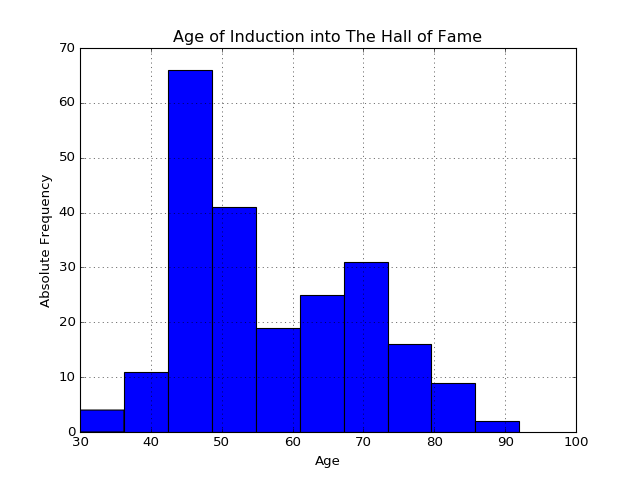

In [33]:
hall_of_famers_master_df.hist(column = 'age_of_induction', bins= 10)

plt.xlabel('Age')
plt.ylabel('Absolute Frequency')
plt.title('Age of Induction into The Hall of Fame')

In [34]:
hall_of_famers_master_df['age_of_induction'].describe()

count    224.000000
mean      56.821429
std       12.649972
min       30.000000
25%       47.000000
50%       52.500000
75%       68.000000
max       92.000000
Name: age_of_induction, dtype: float64

By looking at the Histogram, I can see that instead of a Normal Distribution, the Data has a bimodal distribution with peaks at approximately 45 years old and 70 years old.

From the descriptive statistics data, I can see that the youngest player to be Inducted to the hall of fame was 30 years old (possibly 29 due to error introduced by the age calculation above) and the oldest was 92 years old (also, could have been 91 due to same error). The average age of Players at Induction to the Hall of Fame is approximately 57 Years old. 

There are 21 years in the InterQuartile Range (from 47 to 68 years old), meaning that a prediction for future inductees is: 50% of players will be inducted between 47 and 68 years of age, whereas 25% will be inducted under 47 years of age and 25% will be inducted at over 68 years of age.  

I'm interested to see if the data for the Players inducted PostHumously differ significantly from the Players inducted while still alive - I'll split the data and repeat the describe and histogram steps:

<IPython.core.display.Javascript object>


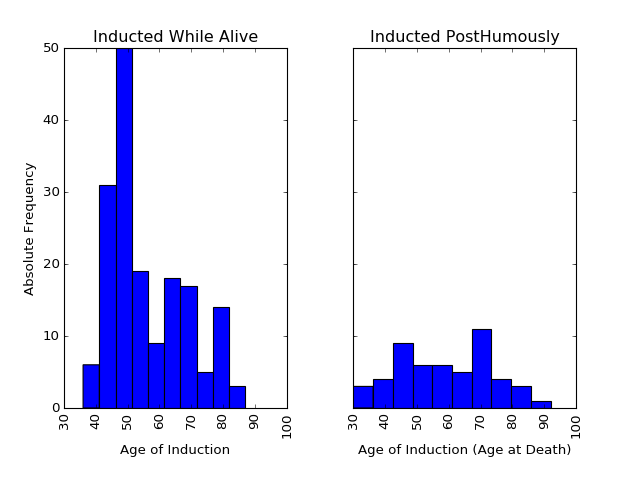

In [35]:
axes = hall_of_famers_master_df.hist(column = 'age_of_induction', by = 'PostHumous_Induction', sharey = True, sharex= True)

axes[0].set_ylabel('Absolute Frequency')
axes[0].set_xlabel('Age of Induction')
axes[0].set_title('Inducted While Alive')
axes[1].set_title('Inducted PostHumously')
axes[1].set_xlabel('Age of Induction (Age at Death)')

In [36]:
hall_of_famers_master_df.groupby('PostHumous_Induction')['age_of_induction'].describe()

PostHumous_Induction       
False                 count    172.000000
                      mean      56.197674
                      std       11.933853
                      min       36.000000
                      25%       47.000000
                      50%       51.000000
                      75%       65.250000
                      max       87.000000
True                  count     52.000000
                      mean      58.884615
                      std       14.715143
                      min       30.000000
                      25%       48.000000
                      50%       59.000000
                      75%       71.000000
                      max       92.000000
Name: age_of_induction, dtype: float64

From the histograms, I can see that both distributions continue to have bimodal properties at the peaks of approximately 45 and 70 years of age, but the strongest peak in the non-PostHumous Group is at approximately 45 years old and the strongest peak for the PostHumous Group is at 70 years old.

In looking at the descriptive statistics for each group, there is not a significant difference - The mean age of induciton is approximately 56 years old for the non-PostHumous Group and 59 years old for the PostHumous Group. You can see that 172 players were inducted while still alive (77% of the total group) and 52 players were inducted PostHumously (23% of the total group).

Next, I'll attempt to answer specific parts the first question: How is Birth Country related to the probability of being inducted into the Hall of Fame?

To visualize this, I'll use a Bar Graph:

<IPython.core.display.Javascript object>


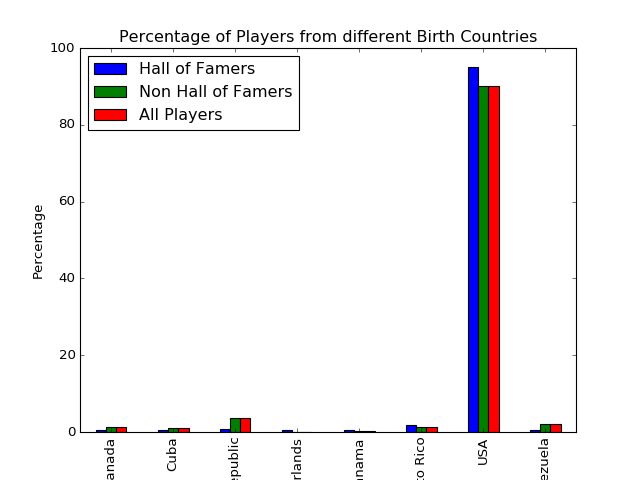

In [37]:
# Group data by Birth Country and count all rows in each group 
# to create a pandas dataframe to pass to the bar graph for Hall of Famers, Non- Hall of Famers and All Players
hof_grouped_by_birthCountry = hall_of_famers_master_df.groupby('birthCountry', as_index=False)['playerID'].count()
non_hof_grouped_by_birthCountry = non_hall_of_famers_master_df.groupby('birthCountry', as_index=False)['playerID'].count()
all_players_grouped_by_birthCountry = master_df_players_only.groupby('birthCountry', as_index=False)['playerID'].count()

#Merge the three groups together into one dataframe and set the index to Birth Country
merged_grouped_data = hof_grouped_by_birthCountry.merge(non_hof_grouped_by_birthCountry,on='birthCountry').merge(all_players_grouped_by_birthCountry,on='birthCountry')
merged_grouped_data.set_index('birthCountry', inplace=True)

# Change the Column Names
merged_grouped_data.columns = ['Hall of Famers', 'Non Hall of Famers', 'All Players']

# Change counts into percentages
merged_grouped_percent_data = merged_grouped_data.apply(lambda x : (x/ x.sum() * 100) )

# Create bar graph
axes = merged_grouped_percent_data.plot.bar()
plt.title('Percentage of Players from different Birth Countries')
plt.ylabel('Percentage')
plt.xlabel("Birth Country")


In [38]:
# Show percentages as a table
print merged_grouped_percent_data

                    Hall of Famers  Non Hall of Famers  All Players
birthCountry                                                       
Canada                    0.446429            1.354339     1.343235
Cuba                      0.446429            1.094527     1.086600
Dominican Republic        0.892857            3.687120     3.652943
Netherlands               0.446429            0.060807     0.065524
Panama                    0.446429            0.298507     0.300317
Puerto Rico               1.785714            1.398563     1.403298
USA                      95.089286           90.132670    90.193295
Venezuela                 0.446429            1.973466     1.954789


Not surprisingly, the majority of Players, whether or not they were Inducted into the hall of fame, are born 
in the USA (~95% of Hall of Famers and ~90% of Non-Hall of Famers). However, as you can see, the USA represents ~90% of the Birth Countries from the population as a whole. If you were taking a random sample, you would expect that ~90% of your sample was born in the USA, as seen in the Non-Hall of Famers Group. Since the proportion of Hall of Famers born in the USA is ~5% higher than the proportion of all players born in the USA, there may be a correlation between being born in the USA and being inducted into the Hall of Fame that is not based solely on the fact that the largest proportion of players are born in the USA.

Next I will look at Length of Career in relation to probability of being inducted to the Hall of Fame:

<IPython.core.display.Javascript object>


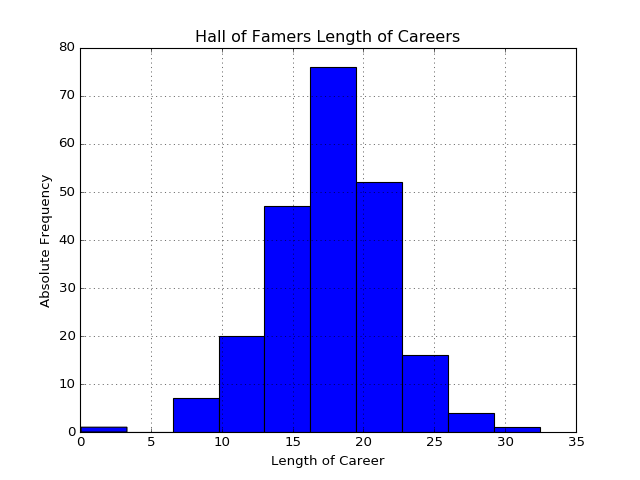

In [39]:
hall_of_famers_master_df.hist(column = 'length_of_career')

plt.xlabel('Length of Career')
plt.ylabel('Absolute Frequency')
plt.title('Hall of Famers Length of Careers')

<IPython.core.display.Javascript object>


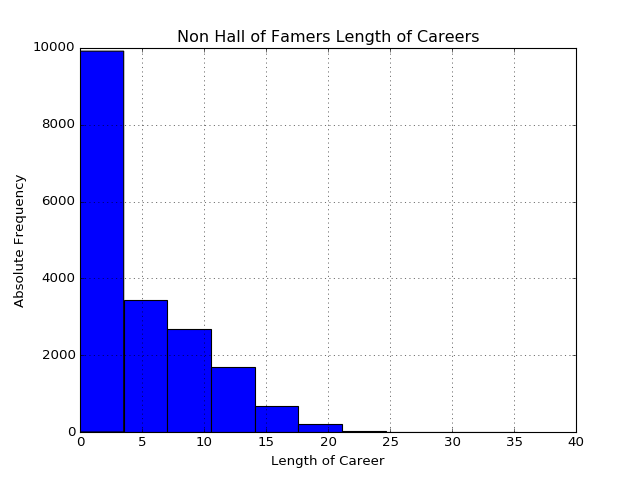

In [40]:
non_hall_of_famers_master_df.hist(column = 'length_of_career')

plt.xlabel('Length of Career')
plt.ylabel('Absolute Frequency')
plt.title('Non Hall of Famers Length of Careers')

<IPython.core.display.Javascript object>


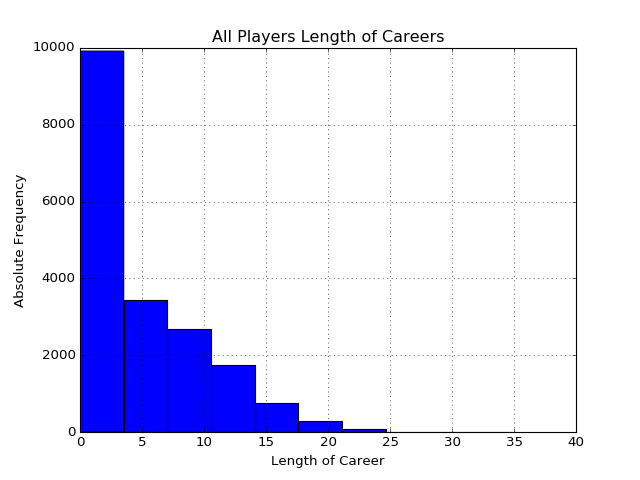

In [41]:
master_df_players_only.hist(column = 'length_of_career')

plt.xlabel('Length of Career')
plt.ylabel('Absolute Frequency')
plt.title('All Players Length of Careers')

These Histograms are quite interesting - as before, the Non-Hall of Famers histogram mirrored the data from the Total Population of Players in terms of Length of Career. The data is positively skewed, with the Majority of Players having a Career of less than 10 years. 

The histogram showing the distribution of the lengths of careers for players inducted into the hall of fame is quite different from the population data, being normally distributed, with very few players having careers less than 10 years in length. 

This shows that there may be a correlation between length of career and probability of being inducted into the hall of fame, my hypothesis would be that a player's chances of being inducted into the hall of fame increase as their length of career increases, particularily after 10 years.

Next I'll look at the relationship between height, weight, BMI and Induction into the Hall of Fame by drawing some boxplots:

<IPython.core.display.Javascript object>


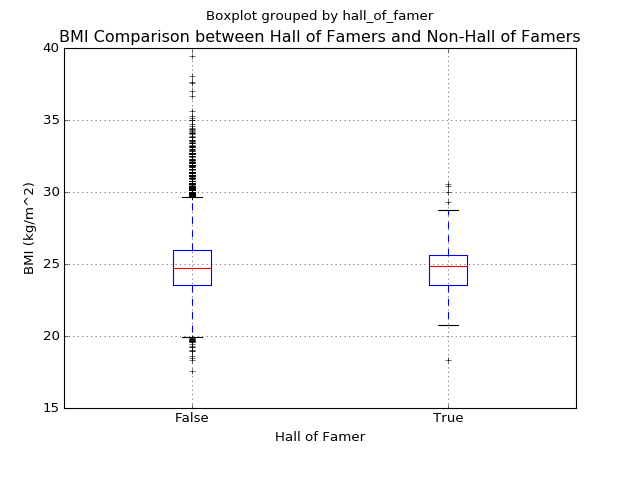

In [42]:
master_df_players_only.boxplot(column = 'BMI', by = 'hall_of_famer')

plt.ylabel('BMI (kg/m^2)')
plt.xlabel('Hall of Famer')
plt.title('BMI Comparison between Hall of Famers and Non-Hall of Famers')

<IPython.core.display.Javascript object>


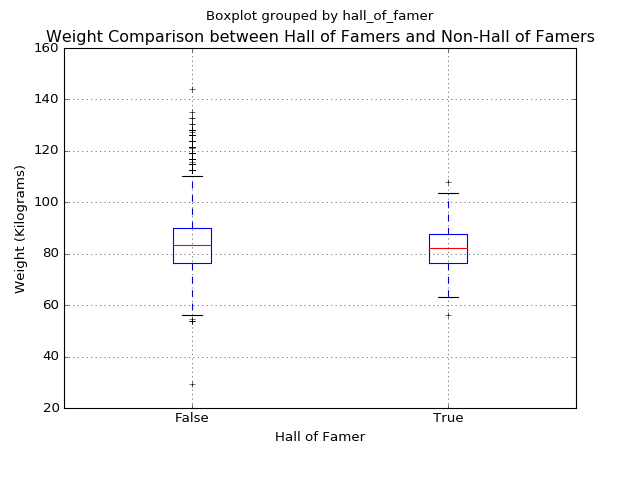

In [43]:
master_df_players_only.boxplot(column = 'weight', by = 'hall_of_famer')

plt.ylabel('Weight (Kilograms)')
plt.xlabel('Hall of Famer')
plt.title('Weight Comparison between Hall of Famers and Non-Hall of Famers')

<IPython.core.display.Javascript object>


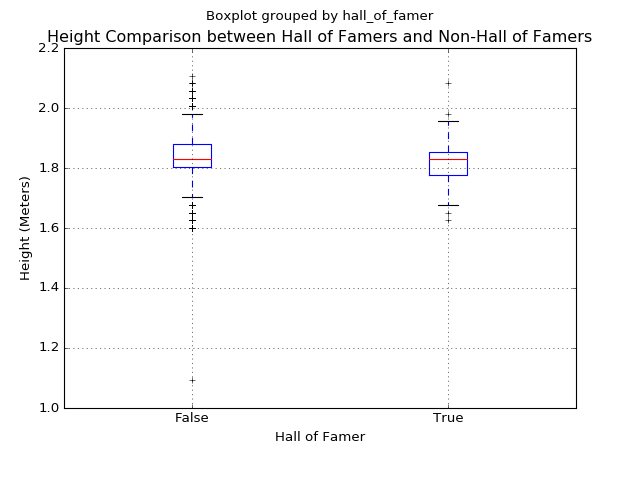

In [44]:
master_df_players_only.boxplot(column = 'height', by = 'hall_of_famer')

plt.ylabel('Height (Meters)')
plt.xlabel('Hall of Famer')
plt.title('Height Comparison between Hall of Famers and Non-Hall of Famers')

There are no clear differences between the Hall of Famers and Non-Hall of Famers that can be inferred from the box plots in terms of Weight, Height and BMI. In all cases, the box plot is more compact for the Hall of Famers, but that is to be expected when you have a smaller group compared to a larger group. 

# Conclusions

In conclusion, there may be correlations between a Player's Birth Country and Length of Career and their Probability of being Inducted into the Hall of Fame, namely, they may have increased chances if they are born in the USA and have a major league career longer than 10 years. Further statistical testing would be required to determine whether or not the differences seen visually in this report are in fact statistically significant, or if they would be considered within the expected normal deviation. 

A player is also 50% likely to be inducted into the Hall of Fame between 47 and 68 years of age, 25% likely to be inducted under 47 years of age and 25% likely to be inducted at over 68 years of age. 

This report is very limited both in scope and depth by the fact that I limited my search for correlation to purely demographical information obtained in full from the Master Table, without delving into the wealth of information available to me in the dataset. The depth was also limited by the fact that I did not run statistical analysis on my findings, and was limited to 2-dimensional feature comparisons via visualizations, instead of running Machine Learning Algorithms that would have allowed n-dimensional comparisons.

# Resources

### Information from these Resources were used extensively in the creation of this Jupyter Notebook:

Baseball Statistics Website: http://www.seanlahman.com/baseball-archive/statistics/ 

Udacity's Intro to Data Analysis Course and Forums: http://www.udacity.com

Panda's Documentation: https://pandas.pydata.org/pandas-docs/stable/index.html

MatPlotLib Documentation: http://matplotlib.org/users/index.html

Stack Overflow: https://stackoverflow.com

Wikipedia (for player information): https://en.wikipedia.org/wiki/Main_Page

Baseball Hall of Fame Website: http://baseballhall.org/